In [1]:
!pip install scikit-learn==1.4.1.post1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 62.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
!pip install kaggle

In [3]:
!mkdir ~/.kaggle

In [4]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
!mv kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets list

ref                                             title                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------  ---------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data              Vehicle Sales Data                  19MB  2024-02-21 20:16:17           6919        116  1.0              
tarunrm09/climate-change-indicators             Climate change Indicators           34KB  2024-02-22 08:53:54           3415         81  1.0              
nbroad/gemma-rewrite-nbroad                     gemma-rewrite-nbroad                 8MB  2024-03-03 04:52:39            271         44  1.0              
nelgiriyewithana/emotions                       Emotions                            16MB  2024-02-05 16:01:39           5339        154  1.0              
nelgiriyewithana/apple-quality                  Apple Quality         

In [8]:
!kaggle datasets download -d fedesoriano/body-fat-prediction-dataset

  0% 0.00/7.43k [00:00<?, ?B/s]
100% 7.43k/7.43k [00:00<00:00, 17.8MB/s]


In [11]:
!unzip body-fat-prediction-dataset.zip

Archive:  body-fat-prediction-dataset.zip
  inflating: bodyfat.csv             


In [10]:
import sklearn
sklearn.__version__

'1.4.1.post1'

In [53]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [13]:
df = pd.read_csv('bodyfat.csv')

In [14]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [41]:
df.shape

(252, 15)

<Axes: >

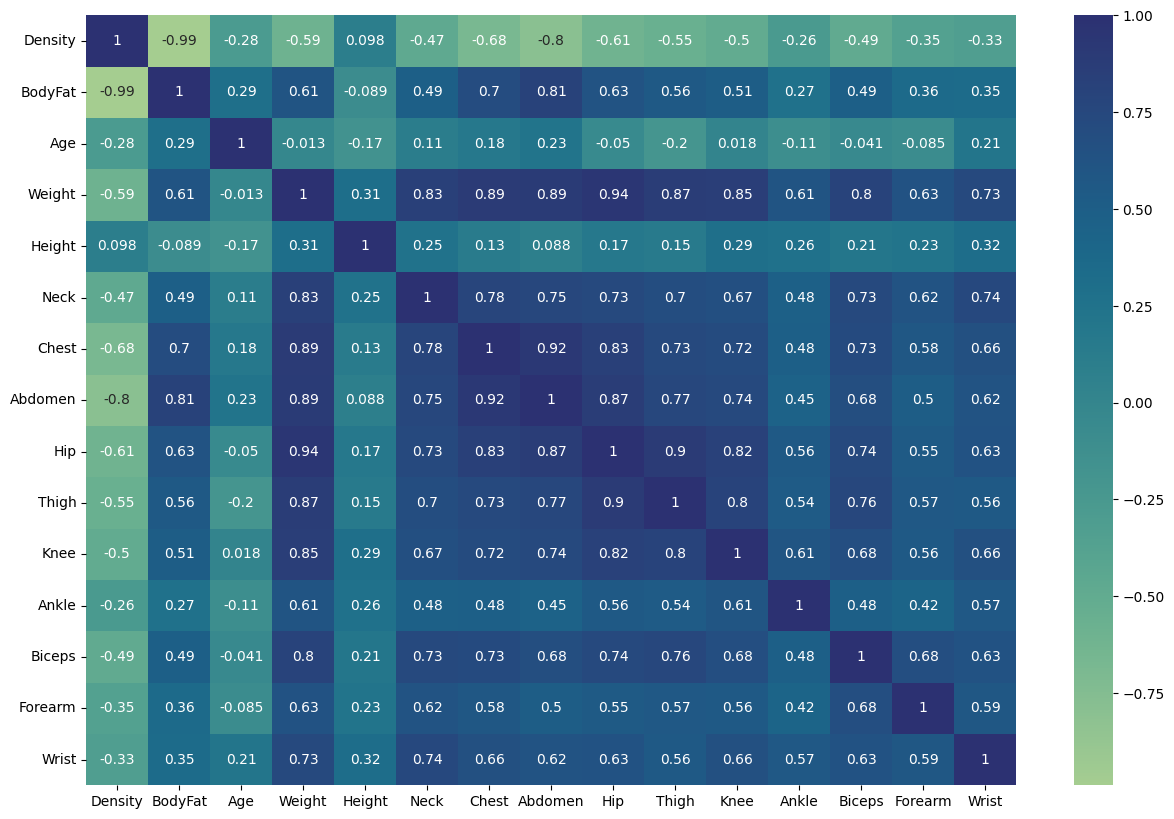

In [17]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='crest', annot=True)

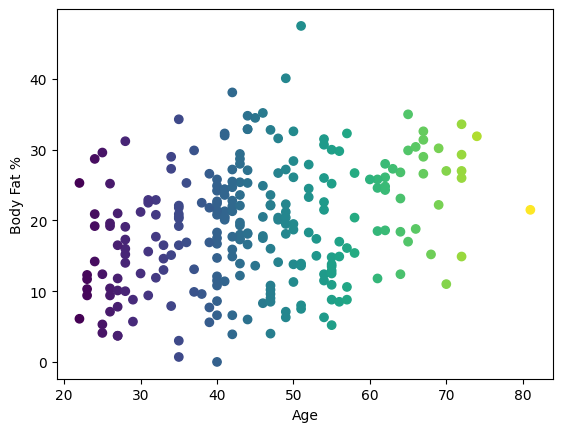

In [31]:
plt.scatter(df["Age"], df["BodyFat"], c=df["Age"])
plt.xlabel("Age")
_ = plt.ylabel("Body Fat %")

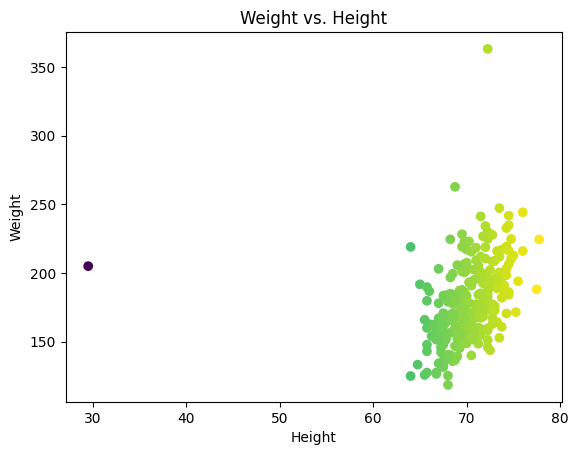

In [32]:
plt.scatter(df['Height'], df['Weight'], c=df['Height'])
plt.xlabel('Height')
plt.ylabel('Weight')
_ = plt.title('Weight vs. Height')

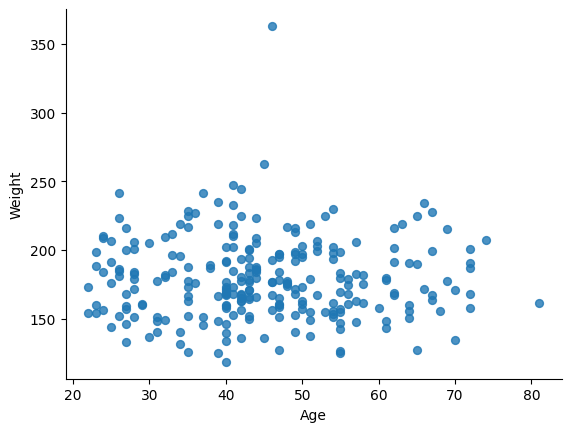

In [36]:
df.plot(kind='scatter', x='Age', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

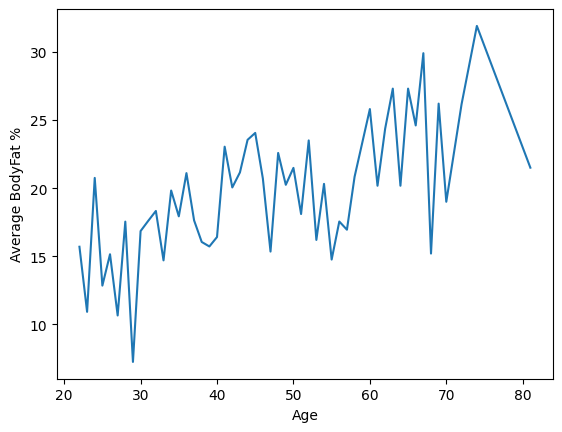

In [33]:
df.groupby('Age')['BodyFat'].mean().plot(kind='line')
plt.xlabel('Age')
_ = plt.ylabel('Average BodyFat %')

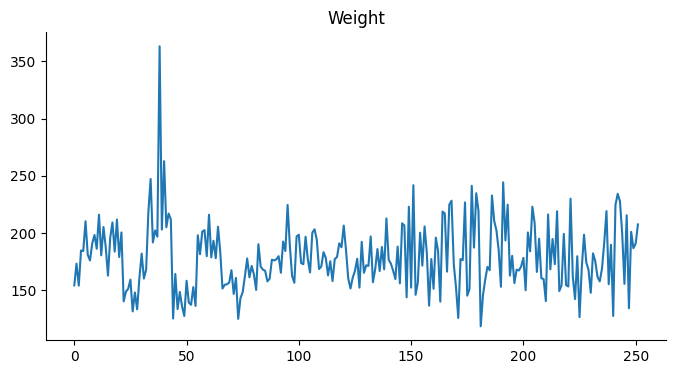

In [34]:
df['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

In [38]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [74]:
X = df.drop('BodyFat', axis=1)

In [75]:
y = df['BodyFat']

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
#model 1 - Linear Regression
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [78]:
y_pred = model1.predict(x_test)

In [79]:
model1_r2 = r2_score(y_test, y_pred)
model1_r2

0.9918244198502368

In [80]:
model1_mae = mean_absolute_error(y_test, y_pred)
model1_mae

0.45953080513039585

In [81]:
model1_mse = mean_squared_error(y_test, y_pred)
model1_mse

0.38031220947726835

In [82]:
#model2 - ElasticNet
model2 = ElasticNet()
model2.fit(x_train, y_train)

ElasticNet()

In [83]:
y_pred = model2.predict(x_test)

In [84]:
model2_r2 = r2_score(y_test, y_pred)
model2_r2

0.5918363629202372

In [85]:
model2_mae = mean_absolute_error(y_test, y_pred)
model2_mae

3.4671554551116492

In [86]:
model2_mse = mean_squared_error(y_test, y_pred)
model2_mse

18.986984630146207

In [87]:
#model3 - KNN
model3 = KNeighborsRegressor()
model3.fit(x_train, y_train)

KNeighborsRegressor()

In [88]:
y_pred = model3.predict(x_test)

In [89]:
model3_r2 = r2_score(y_test, y_pred)
model3_r2

0.47733032931521113

In [90]:
model3_mae = mean_absolute_error(y_test, y_pred)
model3_mae

3.938823529411765

In [91]:
model3_mse = mean_squared_error(y_test, y_pred)
model3_mse

24.31358431372549

In [92]:
results = {
    'Model1 - LinearRegression' : [model1_r2, model1_mae, model1_mse],
    'Model2 - ElasticNet' : [model2_r2, model2_mae, model2_mse],
    'Model3 - KneighborsRegressor' : [model3_r2, model3_mae, model3_mse],
}

In [93]:
results_df = pd.DataFrame(results, columns=list(results.keys()), index=['R2_Score', 'Mean Absolute Error', 'Mean Squared Error'])

In [94]:
results_df.head()

,Model1 - LinearRegression,Model2 - ElasticNet,Model3 - KneighborsRegressor
R2_Score,0.991824,0.591836,0.477330
Mean Absolute Error,0.459531,3.467155,3.938824
Mean Squared Error,0.380312,18.986985,24.313584


<Axes: >

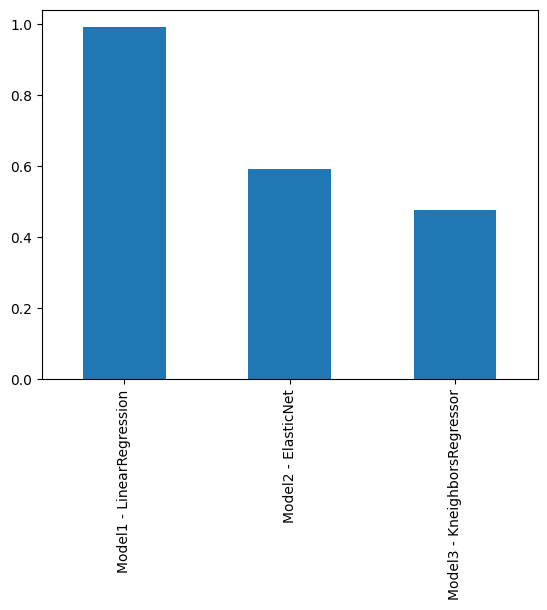

In [97]:
results_df.iloc[0].plot(kind='bar')

<Axes: >

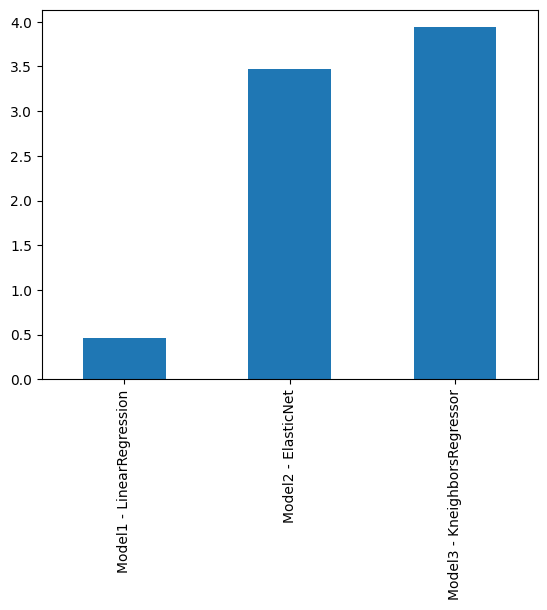

In [98]:
results_df.iloc[1].plot(kind='bar')

<Axes: >

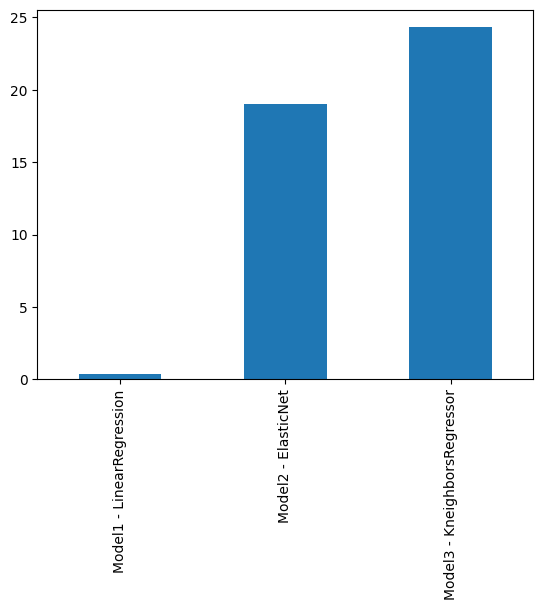

In [99]:
results_df.iloc[2].plot(kind='bar')

In [101]:
import joblib
joblib.dump(model1, 'Fat_Estimator.joblib')

['Fat_Estimator.joblib']